In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import sys 
sys.path.append('../../modules')
import matplotlib_config as mconf
colorI, colorII, colorIII = mconf.set_standard_layout()

#### Notebook to create blueprints for figure 2D

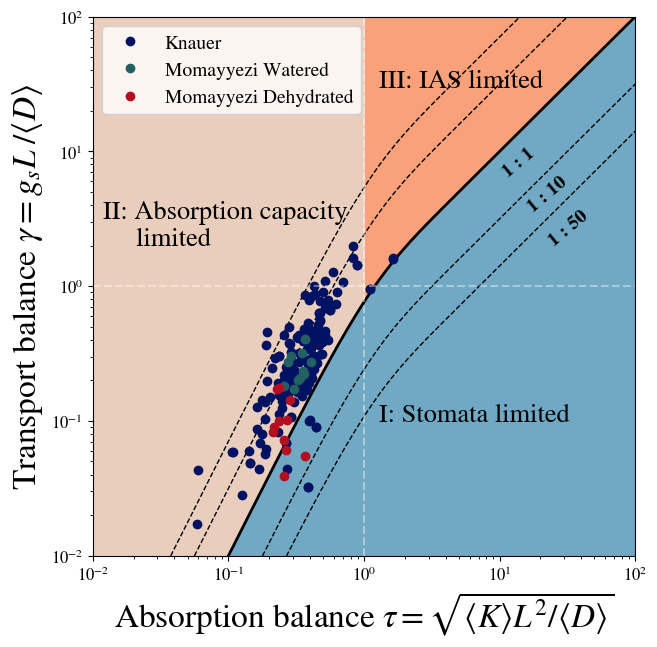

In [ ]:
fig = plt.figure(figsize=(7, 7))
chi_ = 0.1
xmin, xmax = 0.01, 100
taus = np.exp(np.linspace(np.log(xmin), np.log(xmax), 400))
borders = lambda taus, sigma: sigma*taus*np.tanh(taus)

# COLORS
point_colors = [mconf.hex2rgb('001261'), mconf.hex2rgb('226061'), mconf.hex2rgb('B40F20')]

# shading
plt.fill_between(taus, borders(taus, 1), xmin, color=colorI)
plt.fill_between(taus[taus <= 1], xmax, borders(taus[taus <= 1], 1), color=colorII)
plt.fill_between(taus[taus >= 1], xmax, borders(taus[taus >= 1], 1), color=colorIII)
# lines
plt.plot(taus, borders(taus, 1), color='black', linestyle='-', linewidth=2)
plt.plot(taus, borders(taus, np.sqrt(50)), color='black', linestyle='--', linewidth=1)
plt.plot(taus, borders(taus, np.sqrt(10)), color='black', linestyle='--', linewidth=1)
plt.plot(taus, borders(taus, 1/np.sqrt(10)), color='black', linestyle='--', linewidth=1)
plt.plot(taus, borders(taus, 1/np.sqrt(50)), color='black', linestyle='--', linewidth=1)
# annotate
plt.text(10, 6.5, '1 : 1', fontweight='bold', color='black', rotation=40)
plt.text(15.2, 3.6, '1 : 10', fontweight='bold', color='black', rotation=40)
plt.text(22, 2, '1 : 50', fontweight='bold', color='black', rotation=40)
# label the regions
plt.text(1.3, 0.1, r'I: Stomata limited', color='black', fontsize=19)
plt.text(0.012, 2, r'II: Absorption capacity'+'\n     limited', color='black', fontsize=19)
plt.text(1.3, 30, r'III: IAS limited', color='black', fontsize=19)

# load dfKnauer and dfMomayyezi to plot the data points
dfKnauer = pd.read_csv('../../data/saved_data/Knauer2022_hypostomatous.csv', sep=';', decimal=',')
dfMomayyeziW = pd.read_csv('../../data/saved_data/Momayyezi2022_watered.csv', sep=';', decimal=',')
dfMomayyeziDH = pd.read_csv('../../data/saved_data/Momayyezi2022_dehydrated.csv', sep=';', decimal=',')

# plot data points 
for df, color, label in zip([dfKnauer, dfMomayyeziW, dfMomayyeziDH], point_colors, ['Knauer', 'Momayyezi Watered', 'Momayyezi Dehydrated']):
    plt.plot(df['tau'], df['gamma'], 'o', color=color, label=label)

plt.xlabel(r'Absorption balance $\tau = \sqrt{\langle K \rangle L^2 / \langle D \rangle}$', fontsize=24)
plt.ylabel(r'Transport balance $\gamma = g_s L \;/ \langle D \rangle$', fontsize=24)
plt.plot([1, 1], [xmin, xmax], color='white', linestyle='--', alpha=0.4)
plt.plot([xmin, xmax], [1, 1],  color='white', linestyle='--', alpha=0.4)
plt.xscale('log')
plt.yscale('log')
plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)
plt.legend()
plt.savefig('../poster/figure2D.svg')
plt.show()
